In [1]:
import os

In [2]:
# !python time.py torch

In [3]:
# !python time.py tf2

In [4]:
from altair import Chart, X, Y, Scale
import pandas as pd

DIR = "data/"
dfs = [pd.read_csv(DIR + f + ".csv") for f in ["torch", "tf2"]]
df = pd.concat(dfs)
df[df.library == 'torch'].describe()

,Unnamed: 0,time,n,max_iter
count,1000.000000,1.000000e+03,1.000000e+03,1000.0
mean,499.500000,1.379901e-06,1.560935e+06,100.0
std,288.819436,1.170597e-05,3.009259e+06,0.0
min,0.000000,5.800000e-07,1.000000e+03,100.0
25%,249.750000,6.150000e-07,7.742000e+03,100.0
50%,499.500000,7.505000e-07,1.133790e+05,100.0
75%,749.250000,1.014000e-06,1.291549e+06,100.0
max,999.000000,3.694580e-04,1.000000e+07,100.0


In [5]:
Chart(df).mark_line().encode(
    x=X('n', scale=Scale(type='log')),
    # had to use mean; min(torch_times) == 0, so they don't show in log plot
    y=Y('mean(time)', scale=Scale(type='linear')),
    color='library')

alt.Chart(...)

In [6]:
Chart(df).mark_line().encode(
    x=X('n', scale=Scale(type='log')),
    # had to use mean; min(torch_times) == 0, so they don't show in log plot
    y=Y('median(time)', scale=Scale(type='log')),
    color='library'
)

alt.Chart(...)

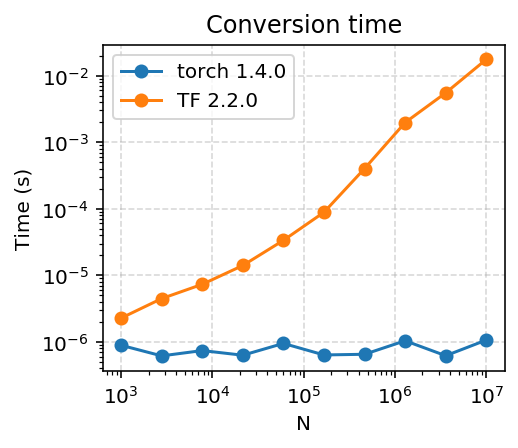

In [12]:
import matplotlib.pyplot as plt

def _get_unique(x):
    assert x.nunique() == 1
    return x.unique()[0]

w = 3
fig, ax = plt.subplots(figsize=(1.2 * w, w))
for library in df.library.unique():
    show = df[df.library == library]
    version = _get_unique(show["version"])
    lines = show.groupby("n")["time"].median()
    if "tensorflow" in library:
        library = "TF"
    lines.plot(ax=ax, logx=True, logy=True, style="o-", label="{} {}".format(library, version))
ax.legend(loc="best")
ax.set_ylabel("Time (s)")
ax.set_xlabel("N")
ax.set_title("Conversion time")
ax.grid(linestyle="--", alpha=0.5)
plt.savefig("images/conversion.png", dpi=300)

In [13]:
show

,Unnamed: 0,time,n,max_iter,library,torch_version,np_version,tf2_version
0,0,0.000069,1000,100,tensorflow-eager,NaN,1.19.0,2.2.0
1,1,0.000012,1000,100,tensorflow-eager,NaN,1.19.0,2.2.0
2,2,0.000017,1000,100,tensorflow-eager,NaN,1.19.0,2.2.0
3,3,0.000010,1000,100,tensorflow-eager,NaN,1.19.0,2.2.0
4,4,0.000006,1000,100,tensorflow-eager,NaN,1.19.0,2.2.0
...,...,...,...,...,...,...,...,...
995,995,0.016437,10000000,100,tensorflow-eager,NaN,1.19.0,2.2.0
996,996,0.018349,10000000,100,tensorflow-eager,NaN,1.19.0,2.2.0
997,997,0.017710,10000000,100,tensorflow-eager,NaN,1.19.0,2.2.0
998,998,0.015082,10000000,100,tensorflow-eager,NaN,1.19.0,2.2.0
